
**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.



## Task 1
For every column in the data:
1. State whether the values match the description given in the table above.
2. State the number of missing values in the column.
3. Describe what you did to make values match the description if they did not
     match.


### BACKGROUND

Vivendo is a fast food chain in Brazil with over 200 outlets.

Customers often claim compensation from the company for food poisoning.

The legal team processes these claims. The legal team has offices in four locations.

The legal team wants to improve how long it takes to reply to customers and close claims.

The head of the legal department wants a report on how each location differs in the time it
takes to close claims.

In [326]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [327]:
df = pd.read_csv('/kaggle/input/d/doubleshield/food-claims/food_claims_2212.csv')



**Food Claims**

In [328]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [329]:
df.shape

(2000, 8)

In [330]:
# Count Claim ID unique value
print("There are " + str(df['claim_id'].nunique()) + " unique Claim ID")

There are 2000 unique Claim ID


In [331]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [332]:
# Converted from "R$50,000.00" to 50000 and cast data type from string to integer
df['claim_amount'] = df['claim_amount'].apply(lambda st: st[st.find("$")+1:st.find(".")]).str.replace(",","")

In [333]:
df['claim_amount'] = pd.to_numeric(df['claim_amount'])

In [334]:
df['claim_amount'] = df['claim_amount'].round(2)

**Converted from "R$50,000.00" to 50000 and cast data type from string to integer**

In [335]:
df.head(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474,51231.37,RECIFE,15,False,unknown
1,2,195,52137,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447,23986.30,SAO LUIS,10,True,meat
3,4,186,29006,27942.72,FORTALEZA,11,False,meat
4,5,138,19520,16251.06,RECIFE,11,False,vegetable


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   int64  
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 125.1+ KB


In [337]:
# Check for null values
df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

In [338]:
# Replace null values in "Cause" column to "unknown"
df['cause'] = df['cause'].fillna('unknown')
print(df.isna().sum())

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64


**Replaced null values in "Cause" column with "unknown"**

In [339]:
df.head(5)

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474,51231.37,RECIFE,15,False,unknown
1,2,195,52137,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447,23986.30,SAO LUIS,10,True,meat
3,4,186,29006,27942.72,FORTALEZA,11,False,meat
4,5,138,19520,16251.06,RECIFE,11,False,vegetable


**Claim ID** :There are 98 unique values that match the description given. There are no missing values. No changes were made to this column.

**Time to Close**: The number of days to close the claim match the description given. There are no missing values. No changes were made to this column.

**Claim Amount**: The initial claim requested in the currency of Brazil did not match the description,the currency inside "Claim Amount" column was replaced and removed from "R$50,000.00" into "50000". There are no missing values.

**Amount Paid**: Final amount paid. In the currency of Brazil, match the description given. There are no missing values. No changes were made to this column.

**Location**: There are 4 different location categories “RECIFE”, “SAO LUIS”,
“FORTALEZA”, and “NATAL” as expected.

**Individuals on Claim**: Number of individuals on this claim. Minimum 1 person, matches the description. There are no missing values. No changes were made to this column.

**Linked Cases**: All of the values in this column were either TRUE or FALSE. There were no missing values. No changes were made to this column.

**Cause**: There are 78 missing value in "Cause" column.All missing values were replaced with "unknown".


## Task 2

Create a visualization that shows the number of claims in each location. Use the
visualization to:

1. State which category of the variable location has the most observations
2. Explain whether the observations are balanced across categories of the variable location

In [340]:
# Count value in cause
print("There are " + str(df['cause'].nunique()) + " Unique cause,")
print("________________")
print("Count 3 Main Cause of the Food Poisoning Injuries :")
print(df['cause'].value_counts())

There are 5 Unique cause,
________________
Count 3 Main Cause of the Food Poisoning Injuries :
meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64


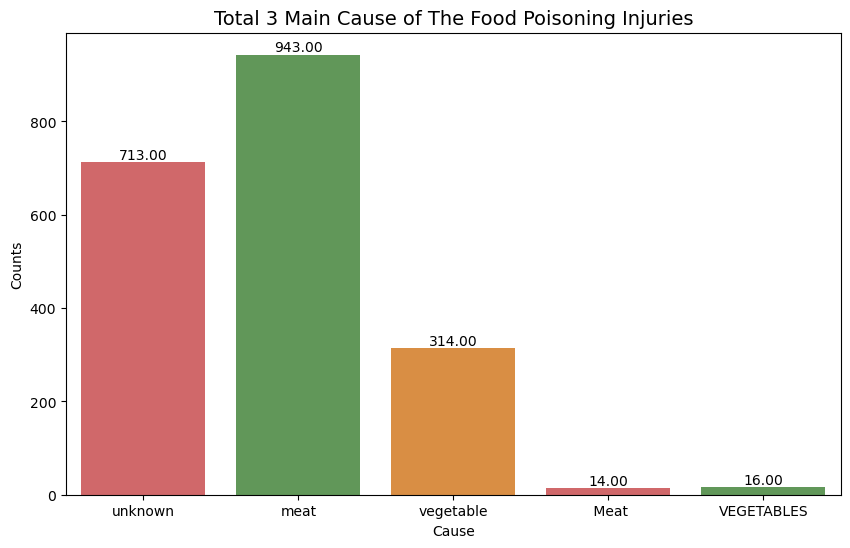

In [341]:
# Plot 3 main cause of the food poisoning injuries
plt.figure(figsize=(10,6))
color = ['#E15759','#59A14F','#F28E2B']
splot = sns.countplot(data=df,x=df['cause'],palette=color)
plt.xlabel("Cause")
plt.ylabel("Counts")
plt.title('Total 3 Main Cause of The Food Poisoning Injuries', fontsize = 14)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

From the plot above, we can see that most of poisoning injuries is cause by unknown, after that cause by meat, and vegetables

In [342]:
# Describe df
df.describe()

,claim_id,time_to_close,claim_amount,amount_paid,individuals_on_claim
count,2000.000000,2000.00000,2000.000000,1964.000000,2000.000000
mean,1000.500000,185.56800,26971.571000,21541.975183,8.049500
std,577.494589,49.16339,16282.730535,12530.156509,4.087347
min,1.000000,76.00000,754.000000,1516.720000,1.000000
25%,500.750000,158.00000,13498.500000,10995.950000,4.000000
50%,1000.500000,179.00000,24764.000000,20105.700000,8.000000
75%,1500.250000,204.00000,38494.000000,30709.350000,12.000000
max,2000.000000,518.00000,76106.000000,52498.750000,15.000000


In [343]:
# Explain whether the observations are balanced across categories of the variable location
print("Total Number of Individual on Claim Differ Across Location:")
print(df.groupby(['location'])['individuals_on_claim'].sum())

Total Number of Individual on Claim Differ Across Location:
location
FORTALEZA    2508
NATAL        2329
RECIFE       7101
SAO LUIS     4161
Name: individuals_on_claim, dtype: int64


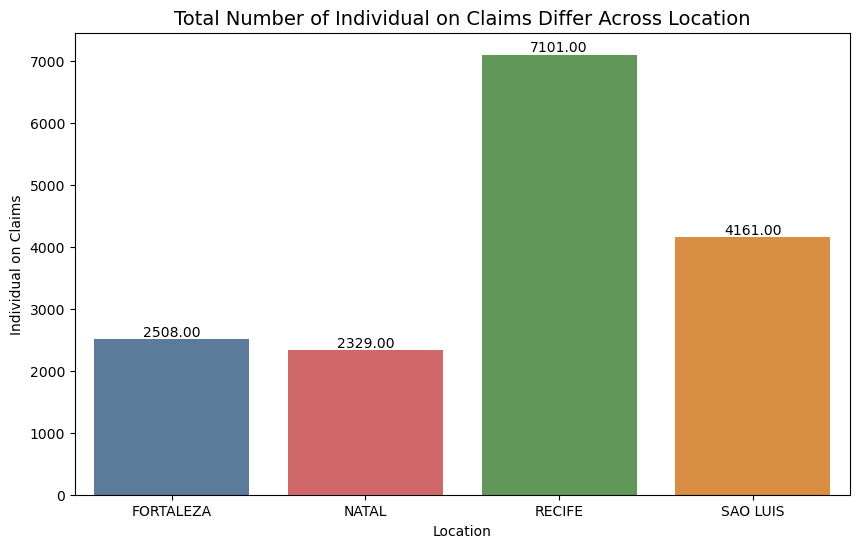

In [344]:
# Plot the number of claim differ across location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
ax = sns.barplot(x = sorted(df["location"].unique()),
                 y = df.groupby(['location'])['individuals_on_claim'].sum(), palette=color)
plt.xlabel("Location")
plt.ylabel("Individual on Claims")
plt.title('Total Number of Individual on Claims Differ Across Location', fontsize = 14)
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

   There are four locations that the legal team processes with claims included in this data. Most claims are listed in Natal, with Sao Luis being second. The categories are unbalanced, with most observations being either Natal or Sao Luis. This would suggest that the legal team should focus on distributing their members to handle claims in place with most claims, then Vivendo fast food company should consider why there are lots of claims in Sao Luis.

## Task 3

Describe the distribution of time to close for all claims. Your answer must include a
visualization that shows the distribution.

As the legal team thinks that the time to close the claims at a location will be important, we should look at how the time to close claims is distributed.

Even though Natal has the most claims, Natal has the least average time to close claims compared with other locations. We can see from the graphic below that Sao Luis has the highest average time to close claims, then less in Recife, Fortaleza, and Natal. This would suggest that the legal team in Natal must have worked efficiently so that they could press the average time to close claims. The legal team should focus on making the average time lower in certain Locations such as Sao Luis and Fortaleza. Even though Fortaleza has the lowest claims, the average time to close claims is slightly high.

There are various time to close between one claim and another. The most common time, it tooks around 0-500 days from someone make a claim until the claim has solved. The distribution of time to close claims is shown as follows using histograph.

In [345]:
# The average time to close claims differ by location?
print("Average time to close claims differ by location: ")
print(df.groupby('location')['time_to_close'].mean())


Average time to close claims differ by location: 
location
FORTALEZA    185.305466
NATAL        185.926829
RECIFE       184.607910
SAO LUIS     187.170213
Name: time_to_close, dtype: float64


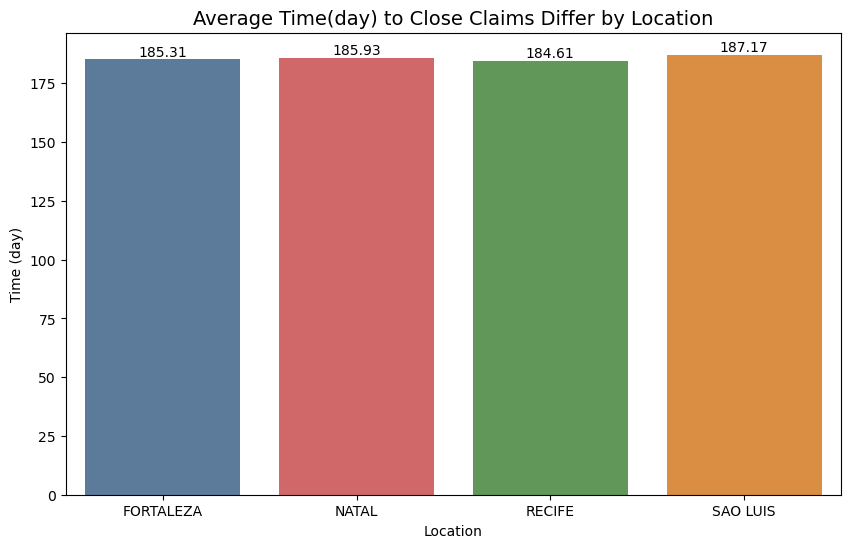

In [346]:
# Plot the the average time to close claims differ by location
plt.figure(figsize=(10,6))
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
bx = sns.barplot(x = sorted(df["location"].unique()),
                 y = df.groupby('location')['time_to_close'].mean(),palette=color)
plt.xlabel("Location")
plt.ylabel("Time (day)")
plt.title('Average Time(day) to Close Claims Differ by Location', fontsize = 14)
for p in bx.patches:
  bx.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.show()

In [347]:
# What is the distribution of time to close claims?
print(df['time_to_close'].value_counts())

176    45
180    44
178    39
182    36
175    36
       ..
406     1
350     1
518     1
90      1
269     1
Name: time_to_close, Length: 256, dtype: int64


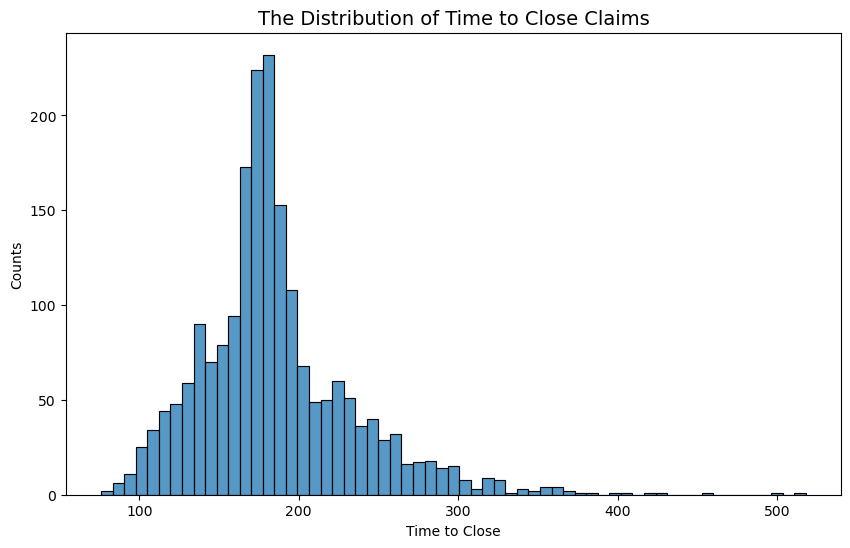

In [348]:
# Plot the distribution of time to close claims
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="time_to_close")
plt.xlabel("Time to Close")
plt.ylabel("Counts")
plt.title('The Distribution of Time to Close Claims', fontsize = 14)
plt.show()

## Task 4

Describe the relationship between time to close and location. Your answer must
include a visualization to demonstrate the relationship.

Following graph is the spread of time to close claims differ by location, Sao Luis has wide range and variance of time to close claims.
Based on all of the below graphics, we would recommend that the legal team should focus on certain location that have highest individual claims, and increasing the effectivity while examine the claims to reduce the time to close within claim. The fast food company should also consider why that there was a highly individual claims in certain location

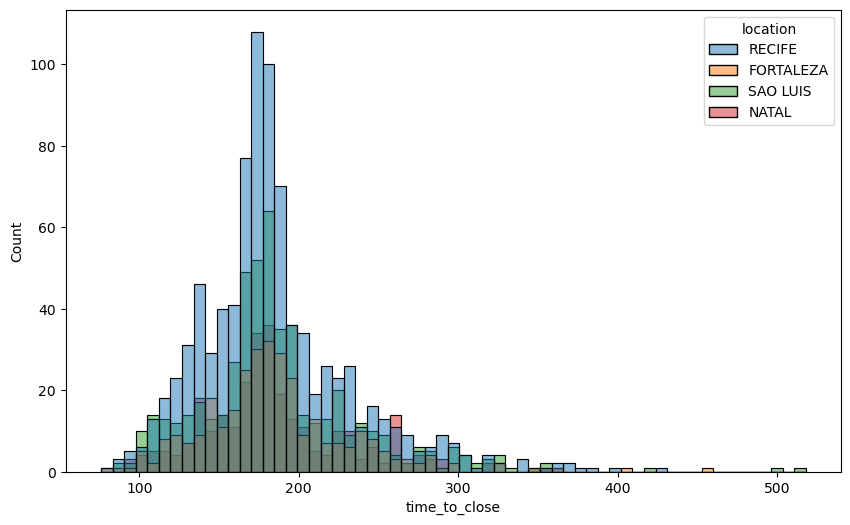

In [349]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="time_to_close", hue="location")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


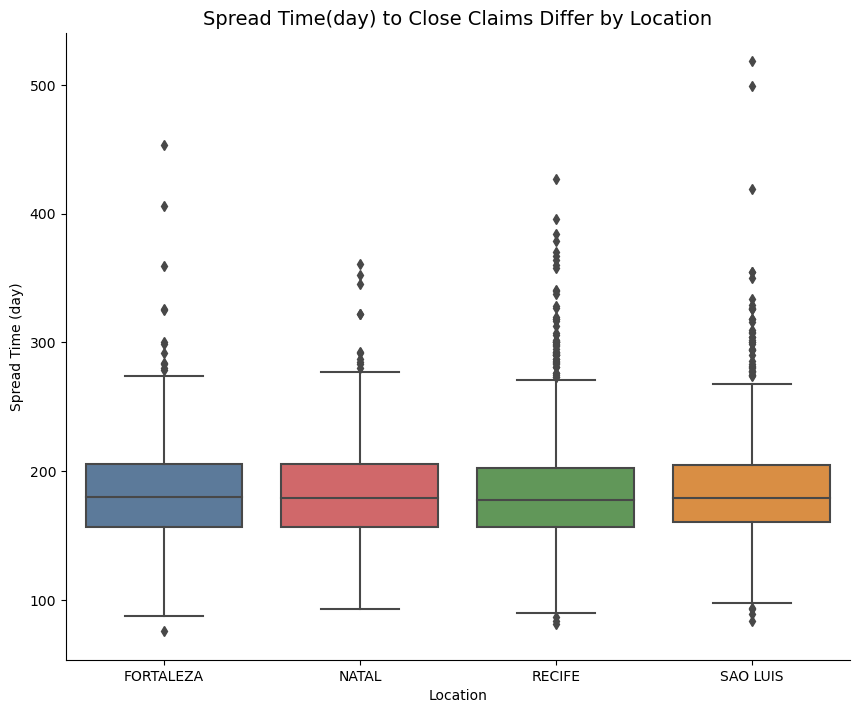

In [350]:
# Plot the time to close claims differ by location
color = ['#5279A4','#E15759','#59A14F','#F28E2B']
cx = sns.catplot(x="location", y='time_to_close', kind="box", data = df, order = sorted(df["location"].unique()), palette=color, height=7, aspect=8.7/7)
plt.xlabel("Location")
plt.ylabel("Spread Time (day)")
plt.title('Spread Time(day) to Close Claims Differ by Location', fontsize = 14)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


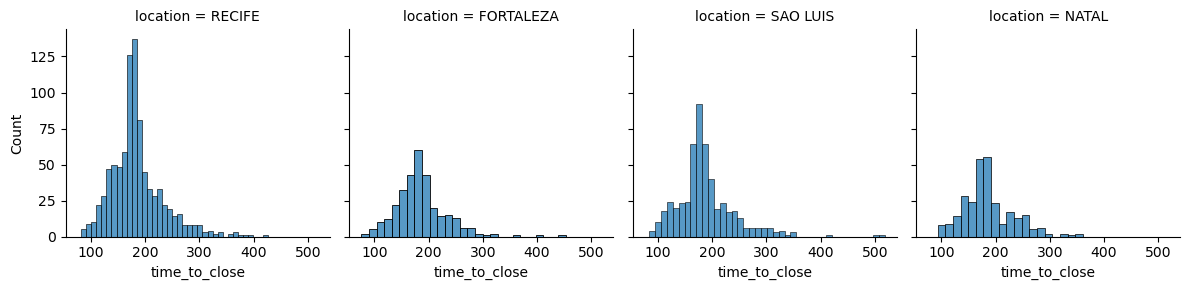

In [351]:
g = sns.FacetGrid(df, col="location")
g.map_dataframe(sns.histplot, x="time_to_close")

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam